In [18]:
import re
import numpy as np
import pandas as pd
import us
import seaborn as sns
from scipy import stats

%matplotlib inline

## Step 1.1: Import death rate file and clean up to import as pd.DataFrame

In [19]:
# Import .txt file
raw_death_fname = 'Underlying Cause of Death, 1999-2016.txt'
with open(raw_death_fname, 'r') as raw_death_f:
    raw_death_content = raw_death_f.read()

# clean up the output by getting rid of the first 8 characters
raw_death_content = raw_death_content[8:]

# split the content by '---'
raw_death_content = re.split('---',raw_death_content)[0]

In [20]:
# split the above content even more by tabs
temp_list = re.split('\t',raw_death_content)
death_content_remix = ''

# convert to a csv
for i in temp_list:
    if i != '\t':
        death_content_remix += (i + ',')
death_content_remix = death_content_remix[:-3]

In [21]:
temp_csv = "temp.csv"

In [22]:
# Save as a csv file
with open(temp_csv, 'w') as f:
    f.write(death_content_remix)

In [23]:
# Open up cleaned up file as a pandas df
df_death = pd.read_csv("temp.csv")
type(df_death)

pandas.core.frame.DataFrame

In [24]:
print('Number of datapoints: {}'.format(len(df_death)))
df_death.head(2)

Number of datapoints: 50


,State,State Code,Deaths,Population,Crude Rate
NaN,Alabama,1,425,4858979,8.747
NaN,Alaska,2,52,738432,7.042


## Step 1.2: Import and clean up mental heath help dataset

In [25]:
raw_mental_fname = "N-MHSS-2015-DS0001-data-excel.csv"

In [26]:
# Read the csv file as a pandas df
df_mental_raw = pd.read_csv(raw_mental_fname)
print("number of datapoints: {}".format(len(df_mental_raw)))

number of datapoints: 12826


In [27]:
df_mental_raw.sample(10)

,CASEID,LST,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,...,LICENMH,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE
7843,201507844,NY,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6812,201506813,NE,1,1,1,0,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0
5045,201505046,MD,1,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2781,201502782,FL,1,1,1,1,0,0,0,0,...,0,1,-1,1,-1,-1,1,-1,-1,0
2321,201502322,DC,1,1,1,1,0,1,0,1,...,1,1,1,1,1,1,0,0,1,0
5747,201505748,MI,1,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8879,201508880,OH,1,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
5149,201505150,MD,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,1,0,0,0
12486,201512487,WI,1,1,1,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2675,201502676,FL,1,1,1,0,0,1,0,0,...,1,0,1,1,1,1,0,0,1,0


### select only valid values

In [28]:
treat_var = ['TREATPSYCHOTHRPY', 
             'TREATFAMTHRPY', 
             'TREATGRPTHRPY', 
             'TREATCOGTHRPY', 
             'TREATDIALTHRPY', 
             'TREATBEHAVMOD', 
             'TREATDUALMHSA', 
             'TREATTRAUMATHRPY', 
             'TREATACTVTYTHRPY', 
             'TREATELECTRO', 
             'TREATTELEMEDINCE', 
             'TREATPSYCHOMED',
             'PAYASST',
             'CRISISTEAM2']

for i in treat_var:
    df_mental_raw = df_mental_raw[(df_mental_raw[i] == 0) | (df_mental_raw[i] == 1)]
len(df_mental_raw)

12411

In [29]:
# aggregate the data by State
df_mental_count = df_mental_raw.groupby([df_mental_raw["LST"]]).count()
df_mental = df_mental_raw.groupby([df_mental_raw["LST"]]).mean()

In [30]:
df_mental.head(3)

,CASEID,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,SETTINGOP,...,LICENMH,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE
LST,,,,,,,,,,,,,,,,,,,,,
AK,2.015002e+08,0.871287,0.891089,0.831683,0.693069,0.792079,0.089109,0.306931,0.079208,0.742574,...,0.663366,0.287129,0.445545,0.237624,0.069307,0.217822,0.366337,0.227723,0.297030,0.000000
AL,2.015001e+08,0.880208,0.828125,0.822917,0.312500,0.546875,0.223958,0.223958,0.328125,0.578125,...,0.838542,0.218750,0.218750,0.036458,0.114583,0.307292,0.062500,0.026042,0.401042,0.010417
AR,2.015008e+08,0.940239,0.960159,0.936255,0.354582,0.498008,0.139442,0.127490,0.346614,0.836653,...,0.689243,0.183267,0.410359,0.223108,0.059761,0.350598,0.513944,0.039841,0.442231,0.023904


In [31]:
df_mental_count.head(3)

,CASEID,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,SETTINGIP,SETTINGRC,SETTINGDTPH,SETTINGOP,...,LICENMH,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE
LST,,,,,,,,,,,,,,,,,,,,,
AK,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
AL,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
AR,251,251,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251


## Step 1.3:Merge the two datasets

In [32]:
# using us convert the abbreviations to full state names
def conversion(x):
    return str(us.states.lookup(x))

In [33]:
# use the above function to translate abbrev to state
df_mental["State"] = df_mental.index
df_mental["State"] = df_mental["State"].apply(conversion)

In [34]:
# merge df_death into df_mental calling new df as df_mega 
#Index on 'State' on both to be safe
df_mega = df_death.merge(df_mental, left_on='State', right_on='State')

# set the index to 'State Code'
df_mega = df_mega.set_index('State Code')

In [35]:
df_mega.head(3)

,State,Deaths,Population,Crude Rate,CASEID,MHINTAKE,MHDIAGEVAL,MHREFERRAL,TREATMT,ADMINSERV,...,LICENMH,LICENSED,LICENPH,LICENSEDFCS,LICENHOS,JCAHO,CARF,COA,CMS,OTHSTATE
State Code,,,,,,,,,,,,,,,,,,,,,
1,Alabama,425,4858979,8.747,2.015001e+08,0.880208,0.828125,0.822917,0.312500,0.546875,...,0.838542,0.218750,0.218750,0.036458,0.114583,0.307292,0.062500,0.026042,0.401042,0.010417
2,Alaska,52,738432,7.042,2.015002e+08,0.871287,0.891089,0.831683,0.693069,0.792079,...,0.663366,0.287129,0.445545,0.237624,0.069307,0.217822,0.366337,0.227723,0.297030,0.000000
4,Arizona,249,6828065,3.647,2.015005e+08,0.739474,0.723684,0.631579,0.742105,0.597368,...,0.615789,0.200000,0.755263,0.118421,0.052632,0.200000,0.215789,0.052632,0.244737,0.047368


# 1.	Gun deaths vs Dimension Reduction of TREAT series besides NOTREAT (TREATPSYCHOTHRPY/TREATGRPTHRPY/TREATCOGTHRPY, etc)

Create a mean measure for the different treatment options (i.e. aggregate TREAT series)

In [36]:
treat_total = df_mega['TREATPSYCHOTHRPY'] + \
    df_mega['TREATFAMTHRPY'] +\
    df_mega['TREATGRPTHRPY'] +\
    df_mega['TREATCOGTHRPY'] +\
    df_mega['TREATDIALTHRPY'] +\
    df_mega['TREATBEHAVMOD'] +\
    df_mega['TREATDUALMHSA'] +\
    df_mega['TREATTRAUMATHRPY'] +\
    df_mega['TREATACTVTYTHRPY'] +\
    df_mega['TREATELECTRO'] +\
    df_mega['TREATTELEMEDINCE'] +\
    df_mega['TREATPSYCHOMED']
treat_avg = treat_total/12

In [37]:
df_mega['treat_agg'] = treat_avg

In [38]:
df_mega['treat_agg'].describe()

count    50.000000
mean      0.589880
std       0.052375
min       0.487487
25%       0.554853
50%       0.580228
75%       0.602303
max       0.709596
Name: treat_agg, dtype: float64

Check normality

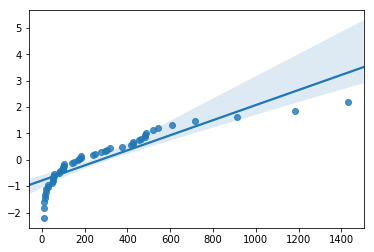

In [39]:
# Check normality of Deaths
qntls, xr = stats.probplot(df_mega['Deaths'], fit=False)
sns.regplot(xr,qntls)

In [40]:
# Log transform non normal Deaths variable
df_mega['log_Deaths'] = df_mega['Deaths'].apply(lambda x: np.log(x))

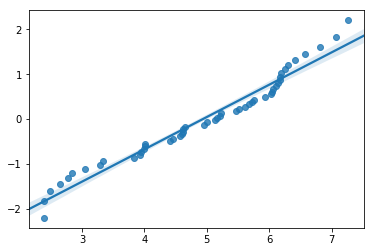

In [41]:
# Check normality with transformed data
qntls, xr = stats.probplot(df_mega['log_Deaths'], fit=False)
sns.regplot(xr,qntls)

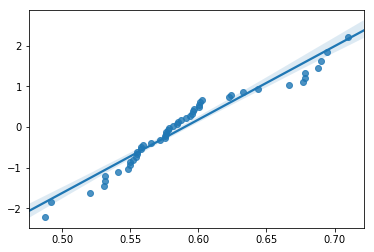

In [42]:
# Check normality of treat_agg
qntls, xr = stats.probplot(df_mega['treat_agg'], fit=False)
sns.regplot(xr,qntls)

In [43]:
df_mega['log_Deaths'].corr(df_mega['treat_agg'])

-0.31002768580099405

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


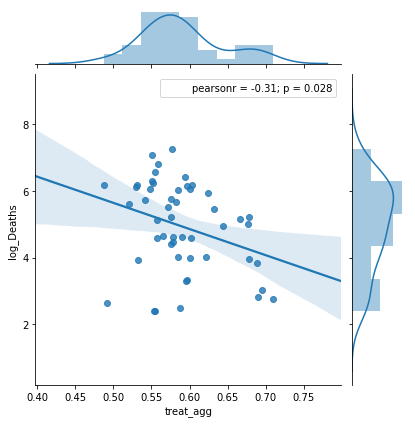

In [44]:
# Plot the two variables together
g = sns.JointGrid(x='treat_agg',y='log_Deaths', data=df_mega)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

Maybe a PCA analysis on the TREAT series might be nice...

# 2.	Gun deaths vs  (MHPSYCHREHAB: Psychosocial Rehabilitation services, MHEMGCY: Psychiatric emergency walk-in services, MHSUICIDE: Suicide prevention services)

In [45]:
rehab_total = df_mega['MHPSYCHREHAB'] + \
    df_mega['MHEMGCY'] +\
    df_mega['MHSUICIDE']
rehab_avg = rehab_total/3

In [46]:
df_mega['rehab_agg'] = rehab_avg

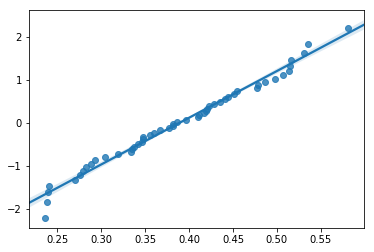

In [47]:
# Check normality of Deaths
qntls, xr = stats.probplot(df_mega['rehab_agg'], fit=False)
sns.regplot(xr,qntls)

In [48]:
df_mega['log_Deaths'].corr(df_mega['rehab_agg'])

-0.12349038357132591

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


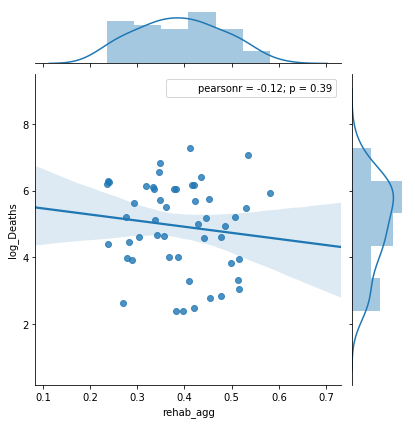

In [49]:
g = sns.JointGrid(x='rehab_agg',y='log_Deaths', data=df_mega)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

# 3.	Gun deaths vs availability of payment reduction (PAYASST)

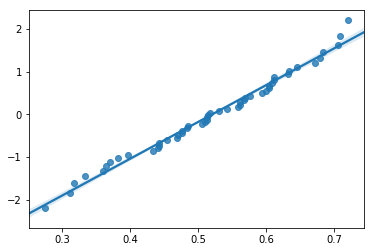

In [50]:
# Check normality of Deaths
qntls, xr = stats.probplot(df_mega['PAYASST'], fit=False)
sns.regplot(xr,qntls)

In [51]:
df_mega['log_Deaths'].corr(df_mega['PAYASST'])

0.0023296410317653862

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


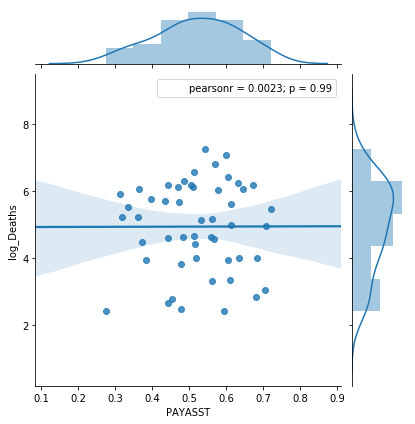

In [52]:
g = sns.JointGrid(x='PAYASST',y='log_Deaths', data=df_mega)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

# 4.	Gun deaths vs availability of crisis intervention (CRISISTEAM2)


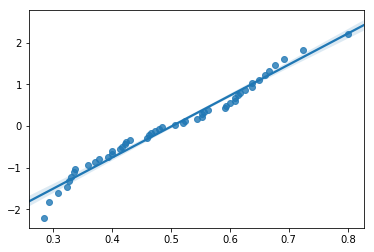

In [53]:
# Check normality of Deaths
qntls, xr = stats.probplot(df_mega['CRISISTEAM2'], fit=False)
sns.regplot(xr,qntls)

In [54]:
df_mega['log_Deaths'].corr(df_mega['CRISISTEAM2'])

-0.20422987618527158

c:\program files\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


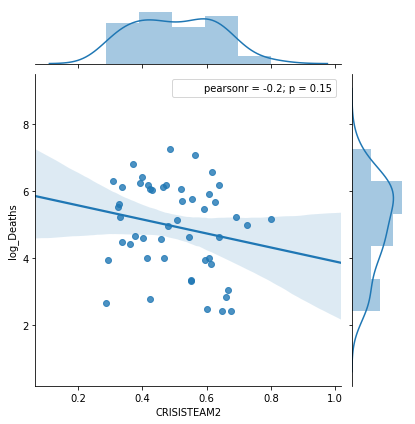

In [55]:
g = sns.JointGrid(x='CRISISTEAM2',y='log_Deaths', data=df_mega)
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

In [56]:
# export as csv so that you can run databricks analysis
df_mega.to_csv('df_mega.csv')